In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10, 6)
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
import scoring

## Clustering

In [2]:
gex = pd.DataFrame.from_csv('Sanger_molecular_data/gex.csv', header=0).transpose()

In [3]:
gex

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,LINC00514,OR1D5,ZNF234,MYH4,LINC00526,PPY2,KRT18P55,POLRMTP1,UBL5P2,TBC1D3P5
22RV1,4.804487,2.848128,10.331994,5.145387,3.545193,2.981772,3.297096,7.914830,8.366785,5.287493,...,3.264254,3.201629,3.878922,2.745669,5.102353,3.080394,3.378913,3.191797,9.466545,3.214997
647-V,8.713556,2.834723,10.504748,3.792188,3.946664,3.106757,3.382905,7.886826,6.176860,5.373848,...,3.314727,3.569253,4.361398,2.459203,4.874740,3.233059,3.648132,3.022160,9.267838,3.340621
A549,8.495961,2.886997,9.643436,4.154471,3.307310,3.132815,9.146877,7.800473,7.921442,4.297621,...,3.169682,3.923083,4.535106,2.611597,4.504059,3.036383,3.259655,2.934753,9.174437,3.450427
BFTC-905,7.813436,2.879330,10.272719,4.050385,3.701491,3.036505,5.133806,8.200329,5.808631,4.880755,...,4.254346,3.736702,3.903117,2.718814,4.950010,2.970800,3.386533,2.931548,9.781957,3.052209
BT-20,7.971621,2.792528,10.601207,5.622674,3.740521,3.377295,3.074383,7.290184,6.322244,5.291903,...,4.631837,3.396205,4.675023,2.586323,5.532821,2.991137,3.554597,3.168497,9.235654,3.299910
BT-474,5.178131,3.015506,10.548792,5.829252,3.800657,3.446415,3.107748,6.727436,5.862634,5.337411,...,8.683069,3.729224,4.335110,2.497412,3.100561,3.040448,3.136316,3.024960,9.594467,3.340264
BT-549,6.383148,2.746627,10.392289,3.802817,4.379548,3.183691,6.262654,8.160151,5.726798,5.552501,...,3.047456,3.076234,4.386448,2.566644,3.753303,3.144031,3.083726,3.406266,9.333854,3.438851
C32,5.542645,2.736643,9.890112,3.346422,3.067727,3.253538,3.300831,8.074968,5.234662,4.348398,...,3.336458,3.269096,4.477071,2.644848,3.797210,3.069556,3.062048,3.185092,9.839337,3.207780
CAL-120,7.632023,2.964585,10.379553,3.614794,3.380681,3.324692,3.566350,8.204530,5.235118,5.369039,...,3.665788,3.134197,4.841169,2.628932,6.786925,2.997054,3.331134,3.130696,9.986616,3.073724
CAL-148,8.121539,2.990916,10.359588,5.680584,4.056182,3.450374,3.723503,6.201861,5.556517,5.508345,...,3.537723,3.996887,4.247065,2.654267,3.973798,3.361569,3.413643,3.375437,9.450962,3.581946


In [4]:
costs = {}
for i in range(5, 25):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(gex.values)
    costs[i] = (1/i) * kmeans.inertia_

In [5]:
costs

{5: 131969.85259682406,
 6: 106859.12862209248,
 7: 89193.363376336099,
 8: 76938.521957441757,
 9: 66378.609459082116,
 10: 58952.712207856428,
 11: 51485.897315950184,
 12: 46232.336437452184,
 13: 42273.610196060632,
 14: 37986.069055732478,
 15: 34923.904314367312,
 16: 31451.110953016516,
 17: 29479.5750131973,
 18: 26849.006965974553,
 19: 24772.108995267357,
 20: 22723.029504895829,
 21: 21226.110361268024,
 22: 19558.166788962229,
 23: 18651.032341995924,
 24: 17277.729878288104}

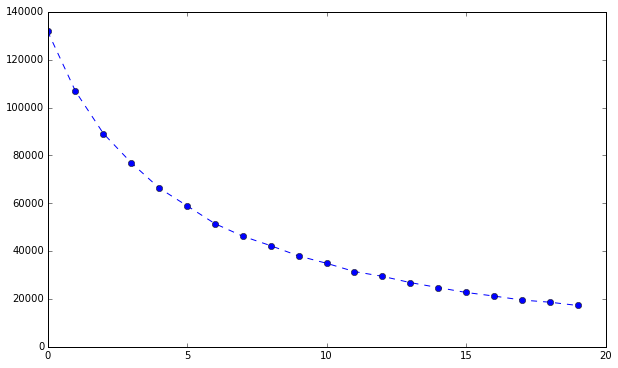

In [6]:
plt.plot([cost for (cluster, cost) in costs.items()], 'bo--')
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(gex.values)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [8]:
kmeans.labels_

array([2, 4, 3, 4, 0, 6, 1, 1, 3, 2, 3, 4, 3, 6, 7, 1, 2, 2, 4, 2, 3, 6, 6,
       6, 3, 4, 4, 0, 3, 0, 3, 1, 4, 4, 7, 3, 7, 5, 3, 7, 1, 6, 6, 3, 6, 6,
       1, 6, 0, 6, 1, 3, 1, 3, 3, 0, 3, 3, 3, 3, 1, 0, 0, 2, 1, 7, 3, 7, 1,
       4, 7, 7, 4, 7, 3, 7, 3, 6, 3, 6, 1, 2, 3], dtype=int32)

In [9]:
kmeans.labels_.shape

(83,)

## Visualize cluster

In [10]:
reduced_data = PCA(n_components=2).fit_transform(gex.values)
kmeans_red = KMeans(n_clusters=8, n_init=10)
kmeans_red.fit(reduced_data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

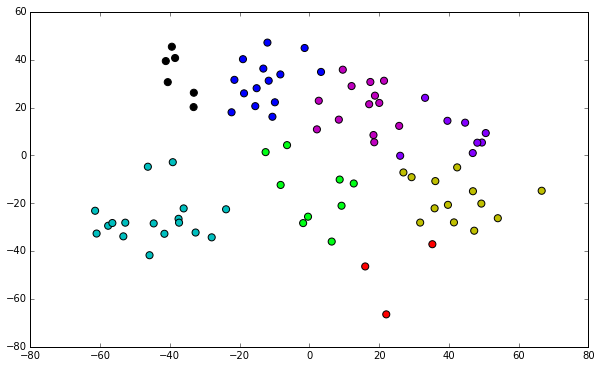

In [11]:
color_list = ['b', 'r', 'c', 'm', 'y', 'k', '#8400FF', '#00FF15'] 
labels = kmeans_red.labels_
colors = [color_list[i] for i in labels]

# plot colored points
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=colors, s=50)
 
# mark centroids as (X)
centroids = kmeans_red.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1], marker='x', s = 100, linewidths=2, c='none')

plt.show();

In [12]:
drug_combined = pd.DataFrame.from_csv('Combined_data/drugInfo_combined.csv', index_col=None)

In [13]:
drug_combined

,CELL_LINE,COMPOUND_A,COMPOUND_B,MAX_CONC_A,MAX_CONC_B,IC50_A,H_A,Einf_A,IC50_B,H_B,...,A_HBA,A_cLogP,A_HBD,A_Lipinski,A_MW,B_HBA,B_cLogP,B_HBD,B_Lipinski,B_MW
0,BT-20,ADAM17,AKT,1.00,75.00,1.000000,0.809002,59.122436,9.639714,0.757977,...,5.079,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000
1,CAL-51,ADAM17,AKT,1.00,75.00,1.000000,0.726984,11.150843,75.000000,0.375043,...,5.079,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000
2,HCC1187,ADAM17,AKT,1.00,75.00,0.410029,1.496901,51.921265,1.000000,0.000000,...,5.079,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000
3,HCC1806,ADAM17,AKT,1.00,75.00,0.313992,10.000000,63.399635,75.000000,0.392570,...,5.079,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000
4,HCC1937,ADAM17,AKT,1.00,75.00,1.000000,0.771830,41.529554,1.677924,1.119487,...,5.079,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000
5,HCC70,ADAM17,AKT,1.00,75.00,0.273313,4.442560,17.441897,1.000000,0.000000,...,5.079,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000
6,MDA-MB-231,ADAM17,AKT,1.00,75.00,1.000000,10.000000,67.000017,1.000000,0.000000,...,5.079,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000
7,MDA-MB-436,ADAM17,AKT,1.00,75.00,0.180147,3.095076,75.768080,1.000000,0.000000,...,5.079,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000
8,MDA-MB-453,ADAM17,AKT,1.00,75.00,0.282664,2.263455,34.219723,1.000000,0.000000,...,5.079,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000
9,M14,ADAM17,AKT,1.00,75.00,0.276412,3.749313,36.292590,0.007500,0.100000,...,5.079,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000


In [14]:
rows = drug_combined['CELL_LINE'].values
to_cluster = gex.ix[rows]

In [15]:
np.isnan(to_cluster.values).any()

True

In [16]:
gex.shape

(83, 17419)

In [17]:
to_cluster.shape

(2145, 17419)

In [18]:
drug_combined.shape

(2145, 21)

In [19]:
imputer = Imputer(missing_values='NaN', strategy="mean", axis=0)
imputer.fit(to_cluster)
to_cluster = pd.DataFrame(imputer.transform(to_cluster), columns = to_cluster.columns, index= to_cluster.index)

In [20]:
np.isnan(to_cluster.values).any()

False

In [21]:
drug_combined['CELL_CLUSTER'] = kmeans.predict(to_cluster)

In [22]:
drug_combined

,CELL_LINE,COMPOUND_A,COMPOUND_B,MAX_CONC_A,MAX_CONC_B,IC50_A,H_A,Einf_A,IC50_B,H_B,...,A_cLogP,A_HBD,A_Lipinski,A_MW,B_HBA,B_cLogP,B_HBD,B_Lipinski,B_MW,CELL_CLUSTER
0,BT-20,ADAM17,AKT,1.00,75.00,1.000000,0.809002,59.122436,9.639714,0.757977,...,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,0
1,CAL-51,ADAM17,AKT,1.00,75.00,1.000000,0.726984,11.150843,75.000000,0.375043,...,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,3
2,HCC1187,ADAM17,AKT,1.00,75.00,0.410029,1.496901,51.921265,1.000000,0.000000,...,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,2
3,HCC1806,ADAM17,AKT,1.00,75.00,0.313992,10.000000,63.399635,75.000000,0.392570,...,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,4
4,HCC1937,ADAM17,AKT,1.00,75.00,1.000000,0.771830,41.529554,1.677924,1.119487,...,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,4
5,HCC70,ADAM17,AKT,1.00,75.00,0.273313,4.442560,17.441897,1.000000,0.000000,...,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,0
6,MDA-MB-231,ADAM17,AKT,1.00,75.00,1.000000,10.000000,67.000017,1.000000,0.000000,...,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,3
7,MDA-MB-436,ADAM17,AKT,1.00,75.00,0.180147,3.095076,75.768080,1.000000,0.000000,...,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,1
8,MDA-MB-453,ADAM17,AKT,1.00,75.00,0.282664,2.263455,34.219723,1.000000,0.000000,...,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,6
9,M14,ADAM17,AKT,1.00,75.00,0.276412,3.749313,36.292590,0.007500,0.100000,...,1.25780,3.010,0.099,402.4961,8.000,1.18000,5.000,0.000,428.9000,1


# Algorithm Training

In [23]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV

In [24]:
orig_data = pd.DataFrame.from_csv('Clean_data/train.csv', header=0, index_col=False)
drug_combined = drug_combined.iloc[np.random.permutation(len(orig_data))]
Xpd = pd.get_dummies(drug_combined, columns=['CELL_LINE', 'COMPOUND_A', 'COMPOUND_B'])
Ypd = orig_data['SYNERGY_SCORE'].reindex(drug_combined.index)
Xvals = Xpd.values
yvals = Ypd.values

In [25]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xvals, yvals)

In [26]:
n_features = Xvals.shape[1]
param_grid_rf = {
    'n_estimators': [30, 50, 80],
    'max_features': ['auto', 'sqrt', 0.25],
    'max_leaf_nodes': [None, n_features],
    'max_depth': [None, 10]
}
rfr = RandomForestRegressor()

In [27]:
grid_search_rf = GridSearchCV(rfr, param_grid_rf, n_jobs=2)
for i in range(3):
    #X_train, X_test, y_train, y_test = cross_validation.train_test_split(Xvals, yvals)
    grid_search_rf.fit(X_train, y_train)
    print(grid_search_rf.best_params_)
    print(grid_search_rf.best_score_)

{'max_features': 'sqrt', 'max_depth': None, 'n_estimators': 80, 'max_leaf_nodes': None}
0.270220367102
{'max_features': 'sqrt', 'max_depth': None, 'n_estimators': 80, 'max_leaf_nodes': None}
0.27534367306
{'max_features': 'sqrt', 'max_depth': None, 'n_estimators': 50, 'max_leaf_nodes': None}
0.272391622991


In [75]:
n_features = n_features = Xvals.shape[1]
rfr = RandomForestRegressor(max_features=.25, max_leaf_nodes=None, 
                            max_depth = None, n_estimators = 60)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.25, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [76]:
rfr.score(X_test, y_test)

0.28519220329921802

## Visualizations

In [49]:
import scipy.stats as stats

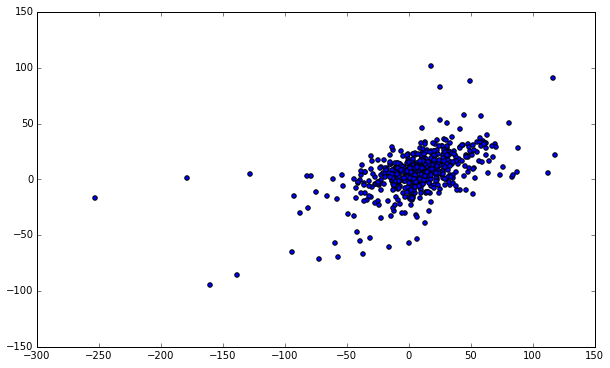

In [77]:
x = y_test
y = rfr.predict(X_test)
plt.scatter(x, y)
plt.show()

In [78]:
stats.pearsonr(x, y)

(0.53712594755042498, 1.8264148530700057e-41)

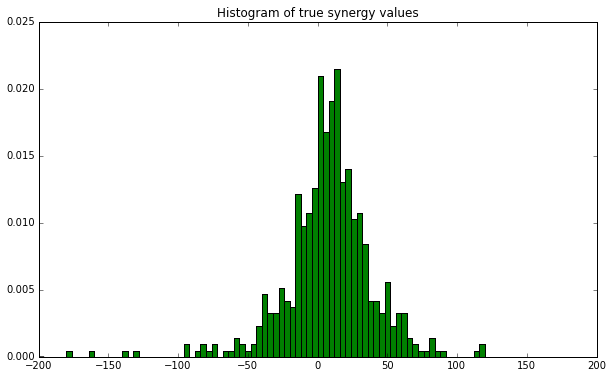

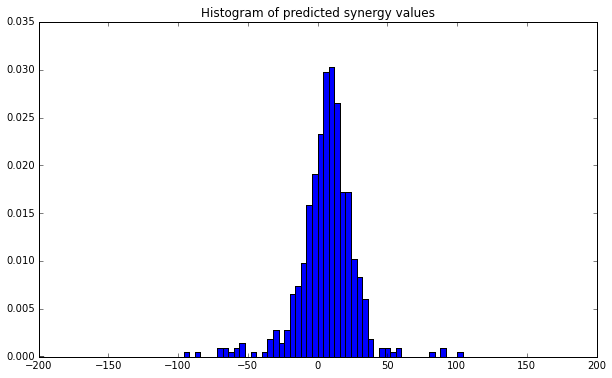

In [80]:
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', range=(-200, 200))
plt.title('Histogram of true synergy values')
plt.figure()
n, bins, patches = plt.hist(y, num_bins, normed=1, facecolor='blue', range=(-200, 200))
plt.title('Histogram of predicted synergy values')
plt.show()